# Notebook to Scrape Webcam Images

## 1. Import & install neccessary packages

In [12]:
#%%capture
#!pip install selenium

In [1]:
# import packages

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import requests
import os
from urllib.parse import urlparse
from datetime import datetime, timedelta
import random
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 2. Set variable values define functions

In [2]:
# set webpage and date of images 
base_url = "https://storage.roundshot.com/6166e782e2c750.93208089"


In [3]:
# Set the start date and today's date
start_date = datetime.strptime("2025-11-28", "%Y-%m-%d")
end_date = datetime.strptime("2025-11-29", "%Y-%m-%d")   #today()


In [4]:
# Create folder to save images
current_dir = os.getcwd()

# Go up one level (parent directory)
parent_dir = os.path.dirname(current_dir)

# Set path for 'images' folder in parent directory
save_folder = os.path.join(parent_dir, "images")

# Create the images folder if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

print(f"Saving images to: {save_folder}")

Saving images to: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\images


In [5]:
# Function to build the target URL
def build_url(date, hour, minute):
    time_str = f"{hour:02d}-{minute:02d}-00"
    filename = f"{date}-{time_str}_full.jpg"
    url = f"{base_url}/{date}/{time_str}/{filename}"
    return url, date, time_str

## 3. Loop through the dates, hours and minutes to save the past images

In [6]:
current_date = start_date

while current_date <= end_date:
    date = current_date.strftime("%Y-%m-%d")
    print(f"Processing date: {date}")

    for hour in range(0, 24):
        # Define minute intervals based on hour
        if 0 <= hour < 7 or 18 <= hour < 24:
            minutes = range(0, 60, 20)  # 0, 20, 40
        else:  # 7 <= hour < 18
            minutes = range(0, 60, 10)  # 0, 10, 20, 30, 40, 50
            
        for minute in minutes:
            url, date_part, time_part = build_url(date, hour, minute)

            # Setup Chrome options for incognito mode
            chrome_options = Options()
            chrome_options.add_argument("--incognito")
            chrome_options.add_argument(
                "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
            )

            # Initialize Selenium WebDriver
            print(f"Opening browser for {date_part} {time_part}...")
            driver = webdriver.Chrome(options=chrome_options)

            try:
                driver.get(url)
                time.sleep(random.uniform(5, 15))  # Random delay

                img_url = driver.current_url

                # Download the image
                response = requests.get(img_url)
                if response.status_code == 200:
                    clean_date_time = f"{date_part}_{time_part}".replace('-', '_')
                    filename = f"img_{clean_date_time}.png"
                    filepath = os.path.join(save_folder, filename)
                    with open(filepath, 'wb') as f:
                        f.write(response.content)
                    print(f"Saved {filename}")
                else:
                    print(f"Image not available for {date_part} {time_part}")
                    print(img_url)

            except Exception as e:
                print(f"Error for {date_part} {time_part}: {e}")

            finally:
                driver.quit()
                print("Browser closed.")

    current_date += timedelta(days=1)

Processing date: 2025-11-28
Opening browser for 2025-11-28 00-00-00...
Saved img_2025_11_28_00_00_00.png
Browser closed.
Opening browser for 2025-11-28 00-20-00...
Saved img_2025_11_28_00_20_00.png
Browser closed.
Opening browser for 2025-11-28 00-40-00...
Saved img_2025_11_28_00_40_00.png
Browser closed.
Opening browser for 2025-11-28 01-00-00...
Saved img_2025_11_28_01_00_00.png
Browser closed.
Opening browser for 2025-11-28 01-20-00...
Saved img_2025_11_28_01_20_00.png
Browser closed.
Opening browser for 2025-11-28 01-40-00...
Saved img_2025_11_28_01_40_00.png
Browser closed.
Opening browser for 2025-11-28 02-00-00...
Saved img_2025_11_28_02_00_00.png
Browser closed.
Opening browser for 2025-11-28 02-20-00...
Saved img_2025_11_28_02_20_00.png
Browser closed.
Opening browser for 2025-11-28 02-40-00...
Saved img_2025_11_28_02_40_00.png
Browser closed.
Opening browser for 2025-11-28 03-00-00...
Saved img_2025_11_28_03_00_00.png
Browser closed.
Opening browser for 2025-11-28 03-20-00...

In [10]:
#In case of an error, downloading images from a specific day at a set time periode

date = "2025-08-31"

In [11]:
# Loop through hours and minutes
for hour in range(00, 6):
    
    # Define minute intervals based on hour
    if 0 <= hour < 6 or 18 <= hour < 24:
        minutes = range(0, 60, 20)  # 0, 20, 40
    else:  # 7 <= hour < 18
        minutes = range(0, 60, 10)  # 0, 10, 20, 30, 40, 50
        
    for minute in minutes:
        url, date_part, time_part = build_url(date, hour, minute)

        # Setup Chrome options for incognito mode
        chrome_options = Options()
        chrome_options.add_argument("--incognito")
        chrome_options.add_argument(
        "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

        # Initialize Selenium WebDriver
        print(f"Opening browser for {date_part} {time_part}...")
        driver = webdriver.Chrome(options=chrome_options)

        try:
            driver.get(url)
            time.sleep(random.uniform(5, 15))  # Random delay

            img_url = driver.current_url

            # Download the image
            response = requests.get(img_url)
            if response.status_code == 200:
                clean_date_time = f"{date_part}_{time_part}".replace('-', '_')
                filename = f"img_{clean_date_time}.png"
                filepath = os.path.join(save_folder, filename)
                with open(filepath, 'wb') as f:
                    f.write(response.content)
                print(f"Saved {filename}")
            else:
                print(f"Image not available for {date_part} {time_part}")
                print(img_url)

        except Exception as e:
            print(f"Error for {date_part} {time_part}: {e}")

        finally:
            driver.quit()
            print("Browser closed.")


Opening browser for 2025-08-31 00-00-00...
Saved img_2025_08_31_00_00_00.png
Browser closed.
Opening browser for 2025-08-31 00-20-00...
Saved img_2025_08_31_00_20_00.png
Browser closed.
Opening browser for 2025-08-31 00-40-00...
Saved img_2025_08_31_00_40_00.png
Browser closed.
Opening browser for 2025-08-31 01-00-00...
Saved img_2025_08_31_01_00_00.png
Browser closed.
Opening browser for 2025-08-31 01-20-00...
Saved img_2025_08_31_01_20_00.png
Browser closed.
Opening browser for 2025-08-31 01-40-00...
Saved img_2025_08_31_01_40_00.png
Browser closed.
Opening browser for 2025-08-31 02-00-00...
Saved img_2025_08_31_02_00_00.png
Browser closed.
Opening browser for 2025-08-31 02-20-00...
Saved img_2025_08_31_02_20_00.png
Browser closed.
Opening browser for 2025-08-31 02-40-00...
Saved img_2025_08_31_02_40_00.png
Browser closed.
Opening browser for 2025-08-31 03-00-00...
Saved img_2025_08_31_03_00_00.png
Browser closed.
Opening browser for 2025-08-31 03-20-00...
Saved img_2025_08_31_03_20_

In [31]:
#Downloading 1 image at 12:00:00 every day between 2022-05-01 and 2025-02-20 from the webcam archive

#start_date = datetime.strptime("2022-05-01", "%Y-%m-%d")
start_date = datetime.strptime("2025-01-01", "%Y-%m-%d")
end_date = datetime.strptime("2025-02-20", "%Y-%m-%d")
#end_date = datetime.strptime("2025-02-20", "%Y-%m-%d")


In [32]:
# Loop through each date and only download the image at 12:00:00
current_date = start_date
while current_date <= end_date:
    date = current_date.strftime("%Y-%m-%d")
    print(f"Processing date: {date}")

    url, date_part, time_part = build_url(date, 12, 0)

    chrome_options = Options()
    chrome_options.add_argument("--incognito")
    chrome_options.add_argument(
        "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    )

    driver = webdriver.Chrome(options=chrome_options)

    try:
        print(f"Opening browser for {date_part} {time_part}...")
        driver.get(url)
        time.sleep(random.uniform(5, 15))  # Random delay

        img_url = driver.current_url

        response = requests.get(img_url)
        if response.status_code == 200:
            clean_date_time = f"{date_part}_{time_part}".replace('-', '_')
            filename = f"img_{clean_date_time}.png"
            filepath = os.path.join(save_folder, filename)
            with open(filepath, 'wb') as f:
                f.write(response.content)
            print(f"Saved {filename}")
        else:
            print(f"Image not available for {date_part} {time_part}")
            print(img_url)

    except Exception as e:
        print(f"Error for {date_part} {time_part}: {e}")

    finally:
        driver.quit()
        print("Browser closed.")

    current_date += timedelta(days=1)

Processing date: 2025-01-01
Opening browser for 2025-01-01 12-00-00...
Saved img_2025_01_01_12_00_00.png
Browser closed.
Processing date: 2025-01-02
Opening browser for 2025-01-02 12-00-00...
Saved img_2025_01_02_12_00_00.png
Browser closed.
Processing date: 2025-01-03
Opening browser for 2025-01-03 12-00-00...
Saved img_2025_01_03_12_00_00.png
Browser closed.
Processing date: 2025-01-04
Opening browser for 2025-01-04 12-00-00...
Saved img_2025_01_04_12_00_00.png
Browser closed.
Processing date: 2025-01-05
Opening browser for 2025-01-05 12-00-00...
Saved img_2025_01_05_12_00_00.png
Browser closed.
Processing date: 2025-01-06
Opening browser for 2025-01-06 12-00-00...
Saved img_2025_01_06_12_00_00.png
Browser closed.
Processing date: 2025-01-07
Opening browser for 2025-01-07 12-00-00...
Saved img_2025_01_07_12_00_00.png
Browser closed.
Processing date: 2025-01-08
Opening browser for 2025-01-08 12-00-00...
Saved img_2025_01_08_12_00_00.png
Browser closed.
Processing date: 2025-01-09
Open

## 4. Experiment to find out at what minute the pictures are taken

The aim of the below code is: to detect the exact time a new webcam image appears on the server, given that images are taken every 10 minutes but appear later. The key is to poll the URL repeatedly until the server responds with the new image, and record the exact time when it happens.

This time calculations are needed to know before we can conduct an on-site experiment with a Stand-up-paddling board, which will serve us for input data for pixel per meter calculations.

✅ Key Features:
* Polling loop (wait_for_image): repeatedly checks the server until the image is available.  

* Records exact detection time: available_time gives you the timestamp when the server actually hosted the image.  

* 10-minute image intervals: loop iterates over every 10 minutes.  

* Timeout control: stops waiting if an image never appears (default 10 minutes).  

In [34]:
# Number of image appearances to record
num_images_to_record = 42

# Interval between first image checks in minutes
interval_minutes = 100

# Polling interval in seconds for detecting new image
poll_interval = 1

# Wait 180 seconds after each 10-min slot before checking
wait_after_slot = 180

# Saving the recorded times of an image appearance time
csv_file = "image_times.csv"   # CSV output file

In [35]:
# Polling function to detect new image
def wait_for_image(url, timeout=600, interval=poll_interval):
    """
    Wait until the image is available on the server.
    Returns the datetime when the image was first available.
    """
    start_time = datetime.now()
    while (datetime.now() - start_time).total_seconds() < timeout:
        try:
            response = requests.head(url)
            if response.status_code == 200:
                return datetime.now()
        except requests.RequestException:
            pass
        time.sleep(interval)
    return None

In [36]:
# --- Prepare CSV ---
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["scheduled_time", "appearance_time", "delay_seconds"])

In [ ]:
# --- Determine first slot to check ---
now = datetime.now()

# Round up to the next 10-minute slot
minute_next_slot = (now.minute // 10 + 1) * 10
if minute_next_slot >= 60:
    first_slot = now.replace(hour=now.hour + 1, minute=0, second=0, microsecond=0)
else:
    first_slot = now.replace(minute=minute_next_slot, second=0, microsecond=0)

recorded = 0
current_slot = first_slot

print(f"Experiment start time: {now.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"First slot to check: {current_slot.strftime('%Y-%m-%d %H:%M:%S')}")

# --- Main experiment loop ---
while recorded < num_images_to_record:
    # Wait until 10-min slot + 180 seconds
    target_start_time = current_slot + timedelta(seconds=wait_after_slot)
    now = datetime.now()
    sleep_seconds = (target_start_time - now).total_seconds()
    if sleep_seconds > 0:
        print(f"Waiting {sleep_seconds:.1f}s until start checking slot {current_slot.strftime('%H:%M:%S')}")
        time.sleep(sleep_seconds)
    
    # Build URL for this slot
    date_str = current_slot.strftime("%Y-%m-%d")
    hour = current_slot.hour
    minute = current_slot.minute<
    url, _, time_str = build_url(date_str, hour, minute)
    print(f"Start checking image for slot {time_str} ...")

    # Poll every 1 second until image appears
    appearance_time = wait_for_image(url)
    if appearance_time:
        # Delay counted from the 10-min slot start
        delay = (appearance_time - current_slot).total_seconds()
        print(f"Image {time_str} appeared at {appearance_time.strftime('%H:%M:%S')} (delay from slot start: {delay:.2f}s)")

        # Download image
        try:
            r = requests.get(url)
            save_path = os.path.join(save_folder, f"{date_str}_{time_str}.jpg")
            with open(save_path, "wb") as f:
                f.write(r.content)
            print(f"Saved to {save_path}")
        except Exception as e:
            print(f"Failed to download: {e}")
        
        # Log to CSV
        with open(csv_file, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([
                current_slot.strftime("%Y-%m-%d %H:%M:%S"),       # scheduled_time
                appearance_time.strftime("%Y-%m-%d %H:%M:%S"),   # actual appearance
                f"{delay:.2f}"                                   # delay from slot start
            ])
        recorded += 1
    else:
        print(f"Image {time_str} not found within timeout.")

    # Move to next 10-minute slot
    current_slot += timedelta(minutes=10)

print(f"Experiment finished. Results saved to {csv_file}")

C:\Users\A\AppData\Local\Temp\ipykernel_16848\213644878.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['scheduled_time'] = pd.to_datetime(df['scheduled_time'])
C:\Users\A\AppData\Local\Temp\ipykernel_16848\213644878.py:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['appearance_time'] = pd.to_datetime(df['appearance_time'])


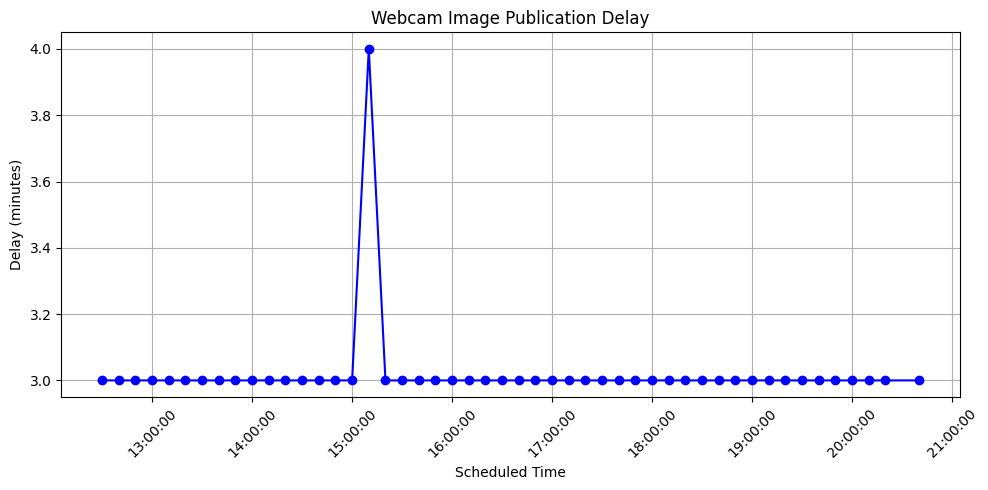

In [22]:
# --- Load your experiment data ---
csv_file = "image_times.csv"
df = pd.read_csv(csv_file)

# Convert strings to datetime objects
df['scheduled_time'] = pd.to_datetime(df['scheduled_time'])
df['appearance_time'] = pd.to_datetime(df['appearance_time'])

# Compute delay in seconds and minutes
df['delay_seconds'] = (df['appearance_time'] - df['scheduled_time']).dt.total_seconds()
df['delay_minutes'] = df['delay_seconds'] / 60

# --- Plot delay over scheduled times ---
plt.figure(figsize=(10, 5))
plt.plot(df['scheduled_time'], df['delay_minutes'], marker='o', linestyle='-', color='blue')

plt.xlabel("Scheduled Time")
plt.ylabel("Delay (minutes)")
plt.title("Webcam Image Publication Delay")
plt.grid(True)

# Format x-axis to show hh:mm:ss
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Optionally, set major ticks every image slot
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# --- Save the plot as PNG (or other formats like .jpg, .pdf, .svg) ---
plt.savefig("webcam_delay_plot.png", dpi=300)

plt.show()